# Telco Customer Churn
##### Focused customer retention programs to see if we can predict if a user  will churn

# Preprocessing of data
- Import necessary packages required
- Read the required CSV
- how the head of the csv Dataframe
- Look at the info of the Dataframe 
- Look to see if there are ny null values
- Replace the space input on the Total Charges and change the dtype
- LabelEncode all the categorical data 
- Create new Dataframe with dropped old columns and new columns 
- Split the data into x(the features ) and y(the dependent) 
- Split the data into training and test sets
- See the statistics of the dataset

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 

from pydot import graph_from_dot_data

import pydotplus

import graphviz
# from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import Image 
# from IPython.display import display

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('CSV/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#### Columns in CSV

- customerID Customer ID
- gender Whether the customer is a male or a female
- SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
- Partner Whether the customer has a partner or not (Yes, No)
- Dependents Whether the customer has dependents or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes or No)

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
data['TotalCharges'] = data['TotalCharges'].replace(' ',0)

In [7]:
data.astype({'TotalCharges': 'float64'}).dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [8]:
le_Churn = LabelEncoder()
le_Gender = LabelEncoder()
le_Partner = LabelEncoder()
le_Dependents = LabelEncoder()
le_PhoneService	 = LabelEncoder()
le_MultipleLines = LabelEncoder()
le_InternetService = LabelEncoder()
le_OnlineSecurity = LabelEncoder()
le_OnlineBackup = LabelEncoder()
le_DeviceProtection = LabelEncoder()
le_TechSupport = LabelEncoder()
le_StreamingTV = LabelEncoder()
le_StreamingMovies = LabelEncoder()
le_Contract = LabelEncoder()
le_PaperlessBilling = LabelEncoder()
le_PaymentMethod = LabelEncoder()

In [9]:
data['Gender_n'] = le_Gender.fit_transform(data['gender'])
data['Partner_n'] = le_Partner.fit_transform(data['Partner'])
data['Dependents_n'] = le_Dependents.fit_transform(data['Dependents'])
data['PhoneService_n'] = le_PhoneService.fit_transform(data['PhoneService'])
data['MultipleLines_n'] = le_MultipleLines.fit_transform(data['MultipleLines'])
data['InternetService_n'] = le_InternetService.fit_transform(data['InternetService'])
data['OnlineSecurity_n'] = le_OnlineSecurity.fit_transform(data['OnlineSecurity'])
data['OnlineBackup_n'] = le_OnlineBackup.fit_transform(data['OnlineBackup'])
data['DeviceProtection_n'] = le_DeviceProtection.fit_transform(data['DeviceProtection'])
data['TechSupport_n'] = le_TechSupport.fit_transform(data['TechSupport'])
data['StreamingTV_n'] = le_StreamingTV.fit_transform(data['StreamingTV'])
data['StreamingMovies_n'] = le_StreamingMovies.fit_transform(data['StreamingMovies'])
data['Contract_n'] = le_Contract.fit_transform(data['Contract'])
data['PaperlessBilling_n'] = le_PaperlessBilling.fit_transform(data['PaperlessBilling'])
data['PaymentMethod_n'] = le_PaymentMethod.fit_transform(data['PaymentMethod'])
data['Churn_n'] = le_Churn.fit_transform(data['Churn'])

In [10]:
data_clean = data.drop(['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],axis='columns')

In [11]:
data_clean.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Gender_n,Partner_n,Dependents_n,PhoneService_n,MultipleLines_n,...,OnlineSecurity_n,OnlineBackup_n,DeviceProtection_n,TechSupport_n,StreamingTV_n,StreamingMovies_n,Contract_n,PaperlessBilling_n,PaymentMethod_n,Churn_n
0,7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1,...,0,2,0,0,0,0,0,1,2,0
1,5575-GNVDE,0,34,56.95,1889.5,1,0,0,1,0,...,2,0,2,0,0,0,1,0,3,0
2,3668-QPYBK,0,2,53.85,108.15,1,0,0,1,0,...,2,2,0,0,0,0,0,1,3,1
3,7795-CFOCW,0,45,42.30,1840.75,1,0,0,0,1,...,2,0,2,2,0,0,1,0,0,0
4,9237-HQITU,0,2,70.70,151.65,0,0,0,1,0,...,0,0,0,0,0,0,0,1,2,1


In [12]:
data_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,Gender_n,Partner_n,Dependents_n,PhoneService_n,MultipleLines_n,InternetService_n,OnlineSecurity_n,OnlineBackup_n,DeviceProtection_n,TechSupport_n,StreamingTV_n,StreamingMovies_n,Contract_n,PaperlessBilling_n,PaymentMethod_n,Churn_n
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,0.504756,0.483033,0.299588,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,0.265370
std,0.368612,24.559481,30.090047,0.500013,0.499748,0.458110,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,29.000000,70.350000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000
75%,0.000000,55.000000,89.850000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000
max,1.000000,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000


In [13]:
data_clean.columns

Index(['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'Gender_n', 'Partner_n', 'Dependents_n',
       'PhoneService_n', 'MultipleLines_n', 'InternetService_n',
       'OnlineSecurity_n', 'OnlineBackup_n', 'DeviceProtection_n',
       'TechSupport_n', 'StreamingTV_n', 'StreamingMovies_n', 'Contract_n',
       'PaperlessBilling_n', 'PaymentMethod_n', 'Churn_n'],
      dtype='object')

In [14]:
x = data_clean.drop(['customerID','Churn_n','SeniorCitizen'],axis='columns')
y = data_clean['Churn_n']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10) 

# EDA(Exploratory Data Analysis)
- Visualize the data to see relationships between people who churned and those who didnt.
- People who churned and didnt churn
- Genders who churned and didnt churn 
- Distribution of monthly charges of those who churned and didnt churn
- See if senior citizens are more likely to churn or not 
- Contract types and likelyness to churn
- Streaming of movies does it afect churning or not 

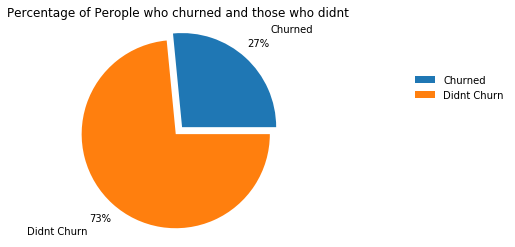

In [15]:
churned = data[data_clean['Churn_n']==1]
unchurned = data_clean[data_clean['Churn_n']==0]

fig, ax = plt.subplots()
labels = ['Churned','Didnt Churn']
percentages = [len(churned), len(unchurned)]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Percentage of Perople who churned and those who didnt")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

<blockquote>  We can notice that in our dataset we have more people who have not churned than those who did churn. This may be caused by the way the data was collected. The split is 27 and 73 percent respectively . We will be looking at other influences of the other columns to see if they had a effect on the likeliness of churning or not .

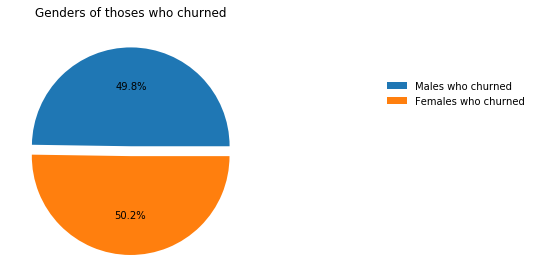

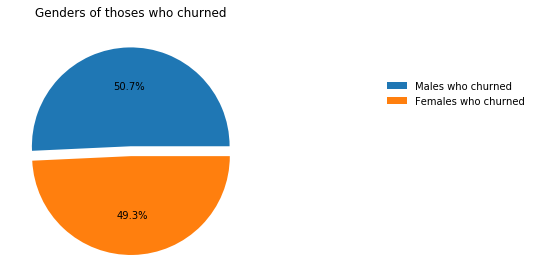

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 4)
y = len(churned[churned.Gender_n == 1]) / len(churned) * 100
z = len(churned[churned.Gender_n == 0]) / len(churned) * 100
plt.title('Genders of thoses who churned')
plt.pie([y, z], explode=(0,0.1),autopct='%1.1f%%')
plt.legend(['Males who churned', 'Females who churned'], frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 3)
y = len(unchurned[unchurned.Gender_n == 1]) / len(unchurned) * 100
z = len(unchurned[unchurned.Gender_n == 0]) / len(unchurned) * 100
plt.title('Genders of thoses who churned')
plt.pie([y, z], explode=(0,0.1),autopct='%1.1f%%')
plt.legend(['Males who churned', 'Females who churned'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

<blockquote> As we look at gender in both the ones who churned and those who ddidnt see can see a almost eqiual distribution meaning gender isnt really a good feature to see the likeliness of someones probability to churn . This occurs in the churned and not yet churned graph . If one were to base a model on this it would be inaccurate .

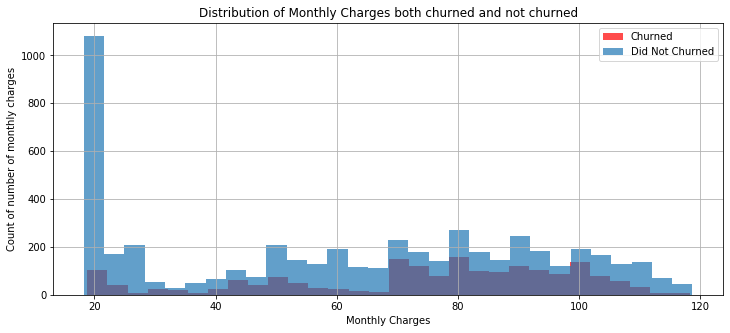

Mean of those who churned 74.4413322632423
Mean of those who didnt churn 61.2651236953999


In [17]:
churned_MonthCharge = data_clean[data_clean['Churn_n']==1]['MonthlyCharges']
unchurned_MonthCharge = data_clean[data_clean['Churn_n']==0]['MonthlyCharges']

fig = plt.figure(figsize=[12,5])
plt.title('Distribution of Monthly Charges both churned and not churned')
churned_MonthCharge.hist(alpha=0.7, bins=30,label='Churned',color='red')
unchurned_MonthCharge.hist(alpha=0.7, bins=30,label='Did Not Churned')
plt.legend(loc='upper right')
plt.ylabel('Count of number of monthly charges')
plt.xlabel('Monthly Charges')
plt.show()

print(f'Mean of those who churned {churned_MonthCharge.mean()}')
print(f'Mean of those who didnt churn {unchurned_MonthCharge.mean()}')

<blockquote>
When we look at the churned histogram in comparison to the did not churn we can see that most or majority of the data pays relatively low monthly charges in comparison to those who pay more . Most of the amount frequenting at round about 20 with a 1000+. Whereas with the people who did churn the large chunk of the data pays relatively more . From the 75 to 100 is where majority of the data resides. The mean also displays this at the mean of the unchurned is lower than the mean of those who churned . From this we can see that churing is related to how much one pays per month , we can almost say that the less ypu pay they less likely you are to churn . Which makes sense as most people want to save as money as possible and them churning means they found a cheap alternative . We love money and want to keep as much of it as possible .


476 1393


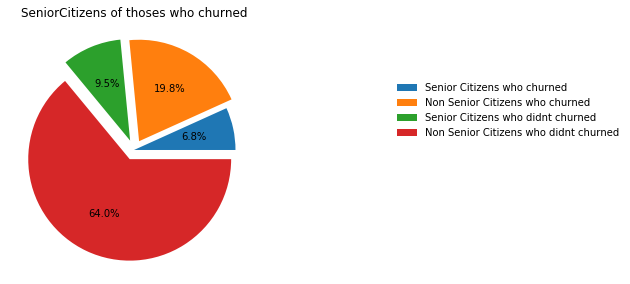

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
y = len(churned[churned.SeniorCitizen  == 1])
z = len(churned[churned.SeniorCitizen  == 0]) 
y1 = len(unchurned[unchurned.SeniorCitizen  == 1]) 
z1 = len(unchurned[unchurned.SeniorCitizen  == 0]) 
print(y,z)
plt.title('SeniorCitizens of thoses who churned')
plt.pie([y, z,y1,z1], explode=(0,0.1,0.1,0.1),autopct='%1.1f%%')
plt.legend(['Senior Citizens who churned', 'Non Senior Citizens who churned','Senior Citizens who didnt churned', 'Non Senior Citizens who didnt churned'], frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()


<blockquote>  Someone being a senier citizen is influence as to churning . From this we can see that more young people are not churning than those who are older senior citizens . 19.8 % of people who churned are Non Senior Citizens and 6.8 are senior citizens . In relation to the 64 percent of non senior citizens that didnt churn in relation to those who are senior citizens 9.5 . If we were to advertise this churning we would target non senior members of society to get them to change as they are youing and are in the pulse of information (social media and the internet) and may see better deals or more likelly to be influenced by such media to make decisions.

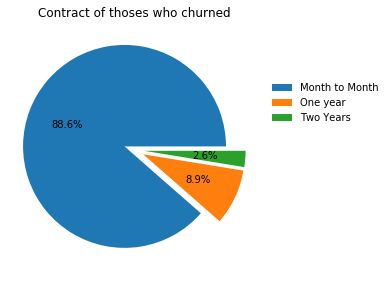

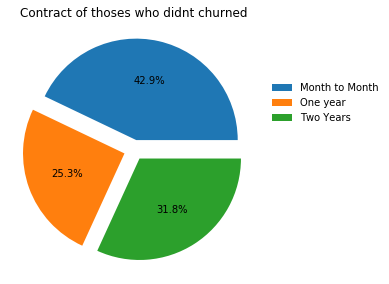

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
x = len(churned[churned.Contract_n  == 0]) 
y = len(churned[churned.Contract_n  == 1]) 
z = len(churned[churned.Contract_n  == 2]) 
plt.title('Contract of thoses who churned')
plt.pie([x ,y, z], explode=(0.1,0.1,0.1),autopct='%1.1f%%')
plt.legend(['Month to Month', 'One year','Two Years'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 2)
x = len(unchurned[unchurned.Contract_n  == 0]) 
y = len(unchurned[unchurned.Contract_n  == 1]) 
z = len(unchurned[unchurned.Contract_n  == 2]) 
plt.title('Contract of thoses who didnt churned')
plt.pie([x,y, z], explode=(0.1,0.1,0.1),autopct='%1.1f%%')
plt.legend(['Month to Month', 'One year','Two Years'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

<blockquote>  If looking to see which of the contracts make up majority of churners we would go with month to month . The reason month to month subscribers are more likely to churn is the freedom month to month gives isnt not binding for several years. Corporations have set up that the longer contract has costly cancellation fee which may result in less churning . The release fee is high hence the 2 year people are the least our of the chart .  

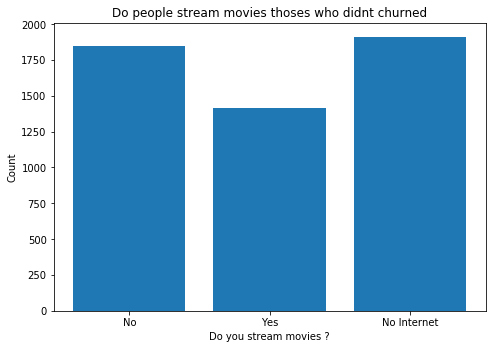

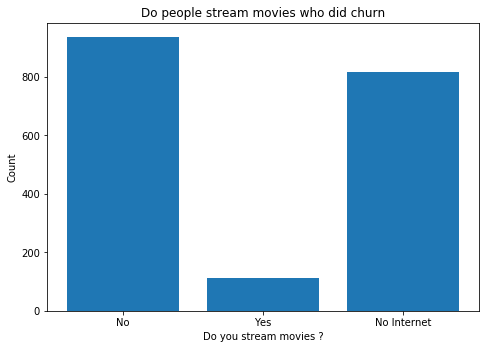

In [20]:
fig = plt.figure()
x = len(unchurned[unchurned.StreamingMovies_n  == 0]) 
y = len(unchurned[unchurned.StreamingMovies_n  == 1]) 
z = len(unchurned[unchurned.StreamingMovies_n  == 2]) 
ax = fig.add_axes([0,0,1,1])
langs = ['No', 'Yes','No Internet']
students = [x,y,z]
ax.bar(langs,students)
plt.title('Do people stream movies thoses who didnt churned')
plt.xlabel('Do you stream movies ?')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
x = len(churned[churned.StreamingMovies_n  == 0]) 
y = len(churned[churned.StreamingMovies_n  == 1]) 
z = len(churned[churned.StreamingMovies_n  == 2]) 
ax = fig.add_axes([0,0,1,1])
langs = ['No', 'Yes','No Internet']
students = [x,y,z]
ax.bar(langs,students)
plt.title('Do people stream movies who did churn')
plt.xlabel('Do you stream movies ?')
plt.ylabel('Count')
plt.show()

<blockquote>  Of the people who churned they didnt not watch or stream movies this is indicated by not having internet or not streaming just because . With everything being digital nobody has time to watch tv so they go onto streaming services and binge watch so somebody who will churn clearly isnt interested in such . So cellular reception isnt a major priority . To those who didnt churn its relatively close usage of all three options . So churners are more likey not to stream or not have internet. Which ties into the young people being on the internet for influence.

## Observations so far:
- Our data is split with 70 percent non churn
- Our data has a 30 perecent churn
- Gender isnt a good feature 
- People who dont stream movies or have no internet are more likely to churn 
- People in month to month contracts are more likely to churn over one year ,and two year contracts 
- The lower the monthly charges the less likely to churn
- Senior Citizens are more likely to churn over Non Senior Citizens

# Here we make our Model
- We use the DecisionTreeClassifier model
- We try 4 DecisionTreeClassifier models to see the effect of tweaking parameters
- We fit them all with the same data to keep it constant
- We predict using all of them using training and test data to see if they good at knowing trained data or new data
- Heatmap showing the correlation to see if it has any influence in the features
- Actual Decision Tree
- ROC Curve

In [21]:
class_tree = DecisionTreeClassifier(max_depth=3,splitter='random')
class_tree_entropy = DecisionTreeClassifier(max_depth=5,criterion='entropy',splitter='random')
class_tree_no_max = DecisionTreeClassifier(splitter='random')
class_tree_no_max_entropy = DecisionTreeClassifier(criterion='entropy',splitter='random')

In [22]:
class_tree.fit(x_train,y_train)
class_tree_entropy.fit(x_train,y_train)
class_tree_no_max.fit(x_train,y_train)
class_tree_no_max_entropy.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

In [23]:
predict_class = class_tree.predict(x_test)
predict_class_entropy = class_tree_entropy.predict(x_test)
predict_class_no_max = class_tree_no_max.predict(x_test)
predict_class_no_max_entropy = class_tree_no_max_entropy.predict(x_test)

In [24]:
print(f'Score of the classification model training with max_depth = 3  = {class_tree.score(x_train, y_train)}')
print(f'Score of the classification model training with criterion = entropy and max_depth = 5  = {class_tree_entropy.score(x_train, y_train)}')
print(f'Score of the classification model training with no changes to params = {class_tree_no_max.score(x_train, y_train)}')
print(f'Score of the classification model training with criterion = entropy = {class_tree_no_max_entropy.score(x_train, y_train)}')

Score of the classification model training with max_depth = 3  = 0.7768903088391906
Score of the classification model training with criterion = entropy and max_depth = 5  = 0.7958821441249556
Score of the classification model training with no changes to params = 0.997515086971956
Score of the classification model training with criterion = entropy = 0.997515086971956


#### From here we can see that our no maximum depth models get close to 1 near perfect on training data . This is because it will continue to split the data until it gets relatively close to information gained is at 1.

In [25]:
print(f'Score of the classification model x_test with max_depth = 3  = {class_tree.score(x_test, y_test)}')
print(f'Score of the classification model x_test with max_depth = 3  = {class_tree_entropy.score(x_test, y_test)}')
print(f'Score of the classification model x_test with max_depth = 3  = {class_tree_no_max.score(x_test, y_test)}')
print(f'Score of the classification model x_test with max_depth = 3  = {class_tree_no_max_entropy.score(x_test, y_test)}')

Score of the classification model x_test with max_depth = 3  = 0.7700496806245565
Score of the classification model x_test with max_depth = 3  = 0.7927608232789212
Score of the classification model x_test with max_depth = 3  = 0.7295954577714692
Score of the classification model x_test with max_depth = 3  = 0.7246273953158269


#### From here we can see that our models that have maximum depth are performing better to new data .Posing 78 and 77 percent whereas the ones without the max depth performed worse but not by much .

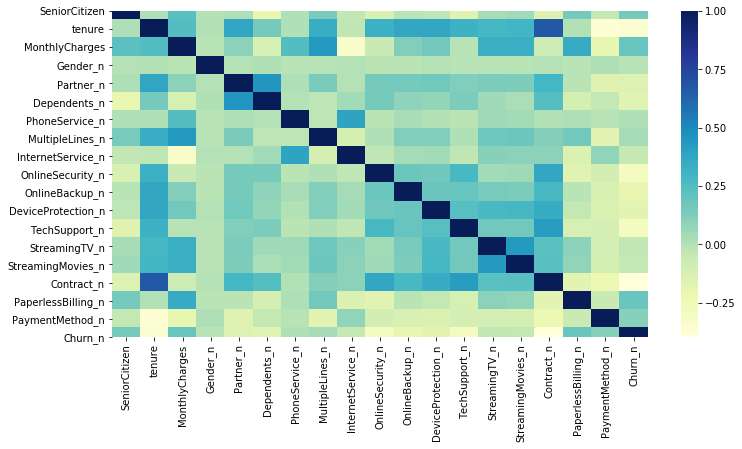

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(data_clean.corr(),cmap="YlGnBu")
plt.show()

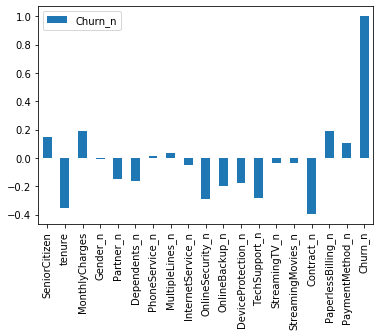

In [27]:
data_clean.corr()[['Churn_n']].plot.bar()

In [28]:
from sklearn.metrics import mean_absolute_error
val_mae_class = mean_absolute_error(predict_class,y_test)
val_mae_class

0.22995031937544358

In [29]:
print(classification_report(y_test,predict_class))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1066
           1       0.53      0.50      0.51       343

    accuracy                           0.77      1409
   macro avg       0.69      0.68      0.68      1409
weighted avg       0.77      0.77      0.77      1409



#### Sensitivity = True Positives / (True Positives + False Negatives)

In [30]:
from sklearn.metrics import confusion_matrix 

print(confusion_matrix(y_test,predict_class))
print(confusion_matrix(y_test,predict_class_entropy))
print(confusion_matrix(y_test,predict_class_no_max))
print(confusion_matrix(y_test,predict_class_no_max_entropy))

[[913 153]
 [171 172]]
[[975  91]
 [201 142]]
[[856 210]
 [171 172]]
[[848 218]
 [170 173]]


#### With our confusion matrix we can see that we get the most with with max depth = 5 , it got 933 True Positives , 133 False Negatives , 173 False Negatives , 170 True Positives

In [31]:
dot_data = tree.export_graphviz(class_tree_entropy)  
graph = graphviz.Source(dot_data)  
graph.render("iris") 

'iris.pdf'

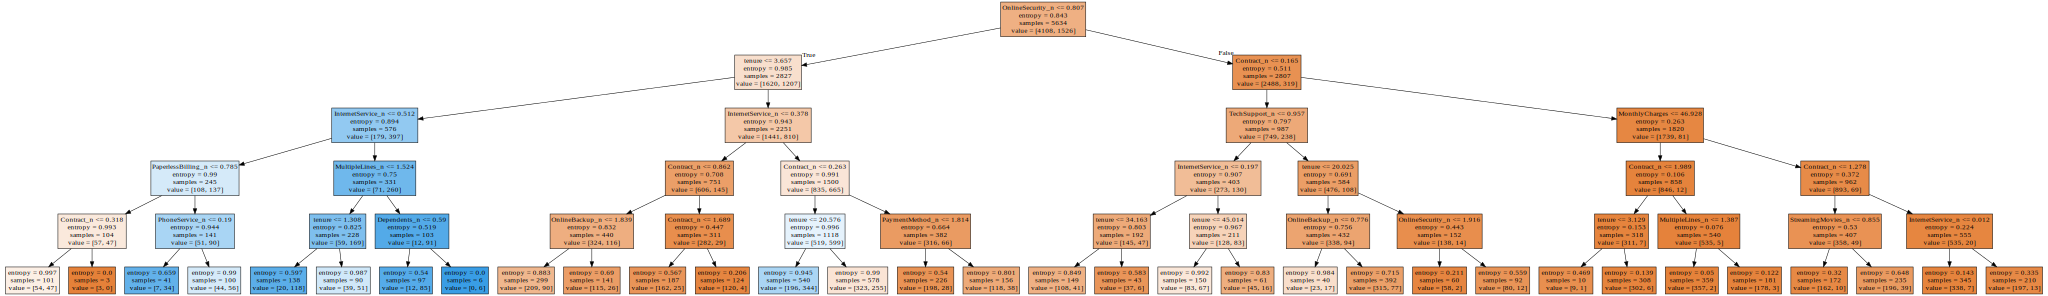

In [32]:
labels = x_train.columns
graph = Source(tree.export_graphviz(class_tree_entropy, out_file=None
   , feature_names=labels, filled = True))
display(SVG(graph.pipe(format='svg')))

#### This is our actual tree that isnt stretched 

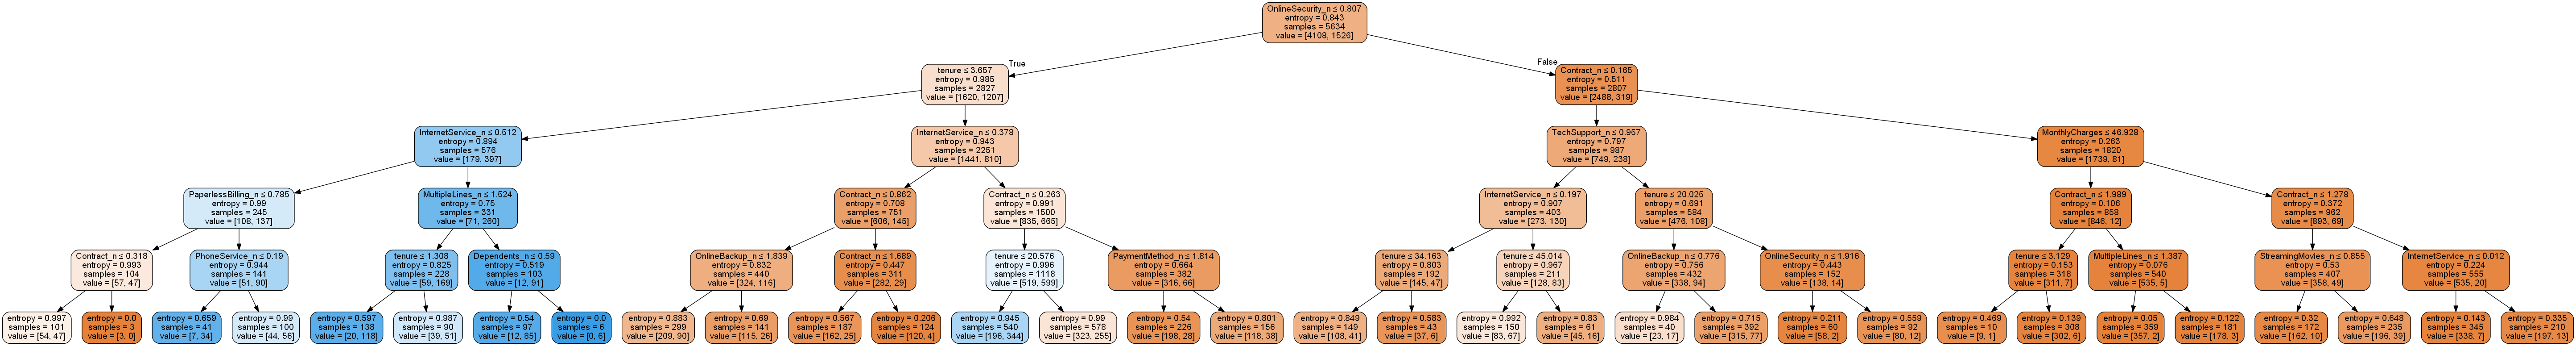

In [33]:

dot_data = StringIO()
export_graphviz(class_tree_entropy, out_file=dot_data, feature_names=x_train.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

#### This is our actual tree fit to your display 

In [34]:
print(roc_auc_score(y_test, predict_class))
print(roc_auc_score(y_test, predict_class_entropy))
print(roc_auc_score(y_test, predict_class_no_max))
print(roc_auc_score(y_test, predict_class_no_max_entropy))

0.6789652607223539
0.6643141577188366
0.6522298010600649
0.649935181791827


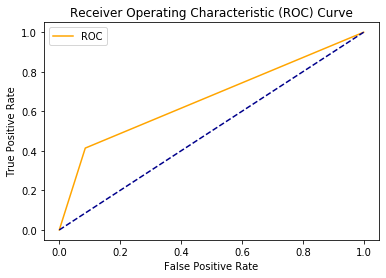

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, predict_class_entropy)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

#### It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.

#### Clearly we have made our model to the best of the ability . All thats left is to further prune 

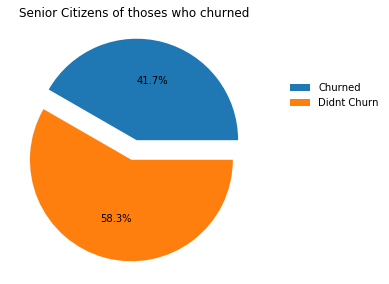

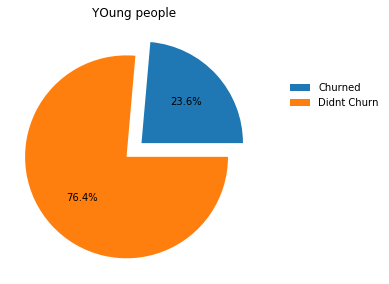

In [36]:
old = data[data_clean['SeniorCitizen']==1]
young = data_clean[data_clean['SeniorCitizen']==0]

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
x = len(old[old.Churn_n  == 1]) 
y = len(old[old.Churn_n  == 0]) 

plt.title('Senior Citizens of thoses who churned')
plt.pie([x ,y], explode=(0.1,0.1),autopct='%1.1f%%')
plt.legend(['Churned', 'Didnt Churn'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 2)
x = len(young[young.Churn_n  == 1]) 
y = len(young[young.Churn_n  == 0]) 
plt.title('YOung people')
plt.pie([x,y], explode=(0.1,0.1),autopct='%1.1f%%')
plt.legend(['Churned', 'Didnt Churn'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()